<a href="https://colab.research.google.com/github/snscatter/WebScraping/blob/main/WebScraping_using_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1 - Retrieves company data from the Financial Modeling Prep (FMP) API. Using your API key, query the FMP API and fetch the following information for the entered ticker symbol:**

#### Company Profile: Company name, industry, website, and description.
#### Real-Time Stock Price: Current stock price.
#### Latest Income Statement: Revenue, Gross Profit, and Net Income from the most recent income statement.

In [ ]:
import requests
import pandas as pd

def get_companies_data(tickers, api_key):
    """
    Retrieves company profile, real-time price, and income statement data from FMP API
    for a list of ticker symbols.

    Args:
        tickers (list): A list of ticker symbols for the companies.
        api_key (str): Your Financial Modeling Prep API key.

    Returns:
        dict: A dictionary where keys are ticker symbols and values are dictionaries
              containing the fetched data (profile, price, income), or None if an error occurs.
    """
    all_companies_data = {}
    for ticker in tickers:
        try:
            # Company Profile
            profile_url = f"https://financialmodelingprep.com/api/v3/profile/{ticker}?apikey={api_key}"
            profile_response = requests.get(profile_url)
            profile_response.raise_for_status()
            profile_data = profile_response.json()
            # Handle cases where profile data might be a list or a single dict
            if isinstance(profile_data, list) and profile_data:
                profile_data = profile_data[0]
            elif not profile_data:
                print(f"No profile data found for {ticker}")
                continue  # Skip to the next ticker

            # Real-Time Stock Price
            price_url = f"https://financialmodelingprep.com/api/v3/quote/{ticker}?apikey={api_key}"
            price_response = requests.get(price_url)
            price_response.raise_for_status()
            price_data = price_response.json()
            # Handle cases where price data might be a list or a single dict
            if isinstance(price_data, list) and price_data:
                price_data = price_data[0]
            elif not price_data:
                print(f"No price data found for {ticker}")
                continue

            # Latest Income Statement
            income_url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=annual&limit=1&apikey={api_key}"
            income_response = requests.get(income_url)
            income_response.raise_for_status()
            income_data = income_response.json()
            # Handle cases where income data might be a list or a single dict
            if isinstance(income_data, list) and income_data:
                income_data = income_data[0]
            elif not income_data:
                print(f"No income data found for {ticker}")
                continue

            all_companies_data[ticker] = {
                "profile": profile_data,
                "price": price_data,
                "income": income_data,
            }

        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for {ticker}: {e}")
        except (KeyError, IndexError) as e:
            print(f"Error parsing data for {ticker}: {e}")

    return all_companies_data

# Example Usage
ticker_symbols = ["AAPL", "GOOGL", "MSFT","META"]  # Example: Apple, Google, Microsoft
api_key = "C67laakmmuFVoZyILhotupO8dNfSC1JY"  # Replace with your actual API key

companies_data = get_companies_data(ticker_symbols, api_key)

if companies_data:
    print("Data retrieved successfully for the specified companies.")
else:
    print("Failed to retrieve data for any of the companies.")

Data retrieved successfully for the specified companies.


## **Task 2 - Displays the retrieved financial data in a structured dataframe within the colab console/terminal.**

In [ ]:
if companies_data:
    # --- Create and populate the combined DataFrame ---
    combined_data = []
    for ticker, data in companies_data.items():
        company_name = data['profile'].get('companyName', 'N/A')
        industry = data['profile'].get('industry', 'N/A')
        website = data['profile'].get('website', 'N/A')
        description = data['profile'].get('description', 'N/A')
        price = data['price'].get('price', 'N/A')
        revenue = data['income'].get('revenue', 'N/A')
        gross_profit = data['income'].get('grossProfit', 'N/A')
        net_income = data['income'].get('netIncome', 'N/A')

        combined_data.append({
            "Company Name": company_name,
            "Industry": industry,
            "Website": website,
            "Company Description": description,
            "Current Stock Price": price,
            "Latest Revenue": revenue,
            "Latest Gross Profit": gross_profit,
            "Latest Net Income": net_income
        })

    combined_df = pd.DataFrame(combined_data)

    # --- Display the combined DataFrame ---
    print("\nCombined Company Data:")
    print(combined_df.to_markdown(index=False, numalign="left", stralign="left"))


Combined Company Data:
| Company Name          | Industry                       | Website                   | Company Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## **Task 3 - Uses python HTML dataframes to present the information effectively. Bonus points if you can show some visualizations with that too**

Company Name,Industry,Website,Company Description,Current Stock Price,Latest Revenue,Latest Gross Profit,Latest Net Income
Apple Inc.,Consumer Electronics,https://www.apple.com,"Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as well as advertising services include third-party licensing arrangements and its own advertising platforms. In addition, the company offers various subscription-based services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple Pay, a cashless payment service, as well as licenses its intellectual property. The company serves consumers, and small and mid-sized businesses; and the education, enterprise, and government markets. It distributes third-party applications for its products through the App Store. The company also sells its products through its retail and online stores, and direct sales force; and third-party cellular network carriers, wholesalers, retailers, and resellers. Apple Inc. was founded in 1976 and is headquartered in Cupertino, California.",213.49,391035000000,180683000000,93736000000
Alphabet Inc.,Internet Content & Information,https://www.abc.xyz,"Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube non-advertising services. The Google Cloud segment offers infrastructure, platform, and other services; Google Workspace that include cloud-based collaboration tools for enterprises, such as Gmail, Docs, Drive, Calendar, and Meet; and other services for enterprise customers. The Other Bets segment sells health technology and internet services. The company was founded in 1998 and is headquartered in Mountain View, California.",165.49,350018000000,203712000000,100118000000
Microsoft Corporation,Software - Infrastructure,https://www.microsoft.com,"Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; a

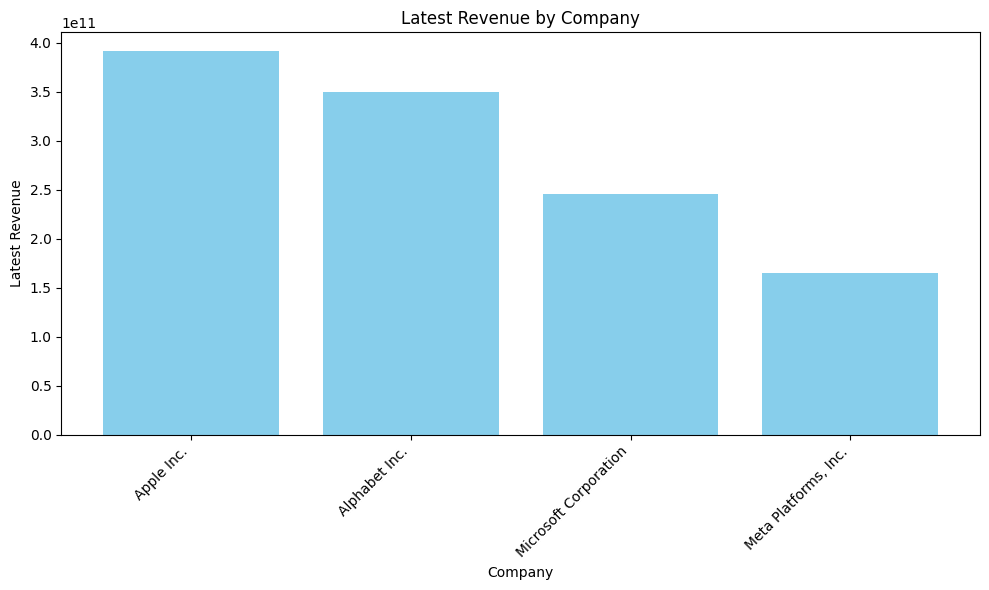

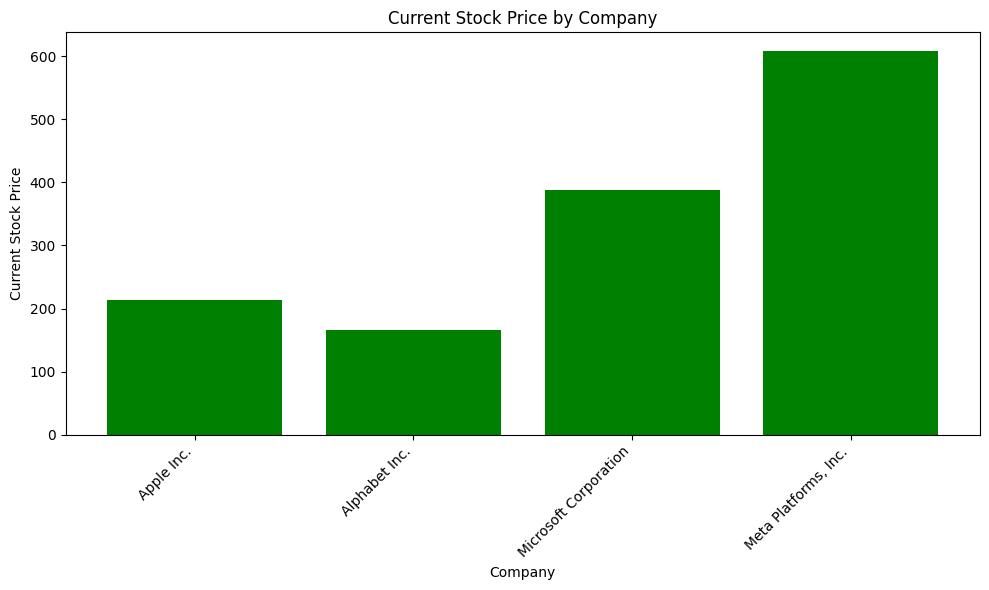

In [ ]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt

if companies_data:
    # --- HTML Display of Combined DataFrame ---
    def display_df_html(df, title):
        """Displays a Pandas DataFrame as an HTML table with a title."""
        html = f"<h3>{title}</h3>"
        html += df.to_html(index=False)
        display(HTML(html))

    display_df_html(combined_df, "Combined Company Data")

    # --- Visualizations (Example: Revenue Bar Chart) ---
    plt.figure(figsize=(10, 6))
    plt.bar(combined_df['Company Name'], combined_df['Latest Revenue'], color='skyblue')
    plt.xlabel("Company")
    plt.ylabel("Latest Revenue")
    plt.title("Latest Revenue by Company")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

    # --- Visualization (Example: Price Bar Chart) ---
    plt.figure(figsize=(10, 6))
    plt.bar(combined_df['Company Name'], combined_df['Current Stock Price'], color='green')
    plt.xlabel("Company")
    plt.ylabel("Current Stock Price")
    plt.title("Current Stock Price by Company")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

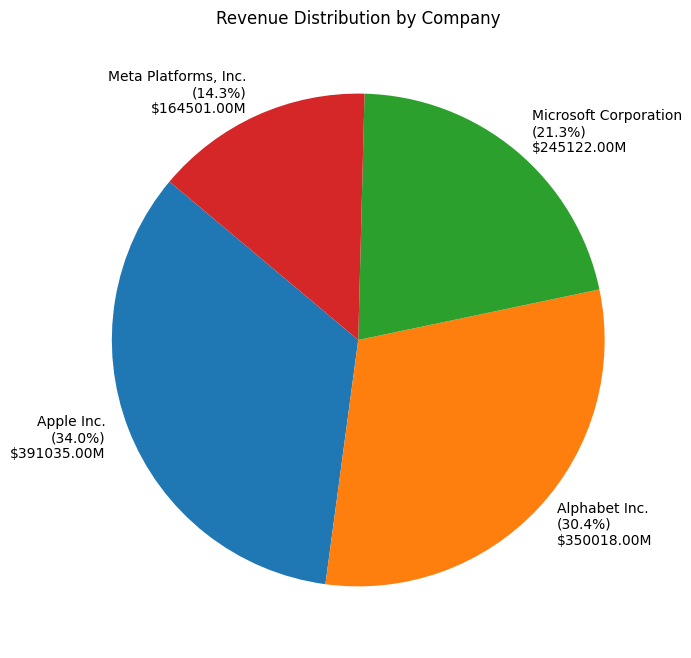

In [ ]:
plt.figure(figsize=(8, 8))
revenues = combined_df['Latest Revenue'].astype(float)  # Convert revenue to numeric
company_names = combined_df['Company Name']
total_revenue = revenues.sum()
revenue_percentages = revenues / total_revenue

# Format revenue numbers in millions
revenue_in_millions = [f"${revenue / 1e6:.2f}M" for revenue in revenues]

labels = [f"{company_names[i]}\n({revenue_percentages[i]:.1%})\n{revenue_in_millions[i]}" for i in range(len(company_names))]

plt.pie(revenues, labels=labels, autopct='', startangle=140)  # autopct='' to remove default percentage labels
plt.title("Revenue Distribution by Company")
plt.show()